# Fake Job Postings Detection

#### Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from io import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
from sklearn import tree, metrics

#### Data Wrangling 

In [2]:
df=pd.read_csv('fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df.shape

(17880, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


Let's do the qualitative and quantative analysis:

In [6]:
df.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [7]:
df['company_profile'].nunique()

1709

In [8]:
df['company_profile'].value_counts()

We help teachers get safe &amp; secure jobs abroad :)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [9]:
df['company_profile'].fillna(df['company_profile'].ffill(),inplace=True)

In [10]:
df['company_profile'].nunique()

1709

In [11]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [12]:
df['telecommuting'].value_counts()

0    17113
1      767
Name: telecommuting, dtype: int64

In [13]:
df['title'].value_counts()

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
                                                     ... 
Account Manager - New York City                         1
Account manager & director of customer success          1
Caregiver's, CNA's and Live-in caregivers needed        1
Freelance Presentation Consultant                       1
Senior Account Manager (German speaking)                1
Name: title, Length: 11231, dtype: int64

In [14]:
df['location'].value_counts()

GB, LND, London                     718
US, NY, New York                    658
US, CA, San Francisco               472
GR, I, Athens                       464
US, ,                               339
                                   ... 
US, GA, Alpharetta, GA                1
US, , Santa Rosa                      1
GB, BST, Clevedon                     1
US, PA, Center City Philadelphia      1
PH, , Makati, Philippines             1
Name: location, Length: 3105, dtype: int64

In [15]:
df['location'].nunique()

3105

In [16]:
df['location'].fillna(df['location'].ffill(),inplace=True)

In [17]:
df['location'].value_counts()

GB, LND, London              732
US, NY, New York             679
US, CA, San Francisco        483
GR, I, Athens                472
US, ,                        345
                            ... 
MX, MEX, Mexico City           1
CA, BC, Port Coquitlam         1
US, OH, Huber Heights          1
PT, 11,                        1
PH, , Makati, Philippines      1
Name: location, Length: 3105, dtype: int64

In [18]:
df['description'].value_counts()

Play with kids, get paid for it Love travel? Jobs in Asia$1,500+ USD monthly ($200 Cost of living)Housing provided (Private/Furnished)Airfare ReimbursedExcellent for student loans/credit cardsGabriel Adkins : #URL_ed9094c60184b8a4975333957f05be37e69d3cdb68decc9dd9a4242733cfd7f7##URL_75db76d58f7994c7db24e8998c2fc953ab9a20ea9ac948b217693963f78d2e6b#12 month contract : Apply today                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [19]:
df['description'].fillna(df['description'].bfill(),inplace=True)

In [20]:
df['requirements'].value_counts()

University degree required. TEFL / TESOL / CELTA or teaching experience preferred but not necessaryCanada/US passport holders only                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            410
University degree required. TEFL / TESOL / CELTA or teaching experience preferred but not necessaryPositive attitude required. Canada/US passport holders only                                                                                                                        

In [21]:
df['requirements'].fillna(df['requirements'].bfill(),inplace=True)


Filling the null values of object type with forward filling and backward filling and the Int/float types with mean or median depending upon skewness.

#### Exploratory Data Analysis

In [22]:
df.isnull().sum()

job_id                     0
title                      0
location                   0
department             11547
salary_range           15012
company_profile            0
description                0
requirements               0
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [23]:
for i in df.columns:
    print('% of null records in feature',i,': {:.2f}%'.format(df[i].isnull().sum()*100/len(df[i])))

% of null records in feature job_id : 0.00%
% of null records in feature title : 0.00%
% of null records in feature location : 0.00%
% of null records in feature department : 64.58%
% of null records in feature salary_range : 83.96%
% of null records in feature company_profile : 0.00%
% of null records in feature description : 0.00%
% of null records in feature requirements : 0.00%
% of null records in feature benefits : 40.32%
% of null records in feature telecommuting : 0.00%
% of null records in feature has_company_logo : 0.00%
% of null records in feature has_questions : 0.00%
% of null records in feature employment_type : 19.41%
% of null records in feature required_experience : 39.43%
% of null records in feature required_education : 45.33%
% of null records in feature industry : 27.42%
% of null records in feature function : 36.10%
% of null records in feature fraudulent : 0.00%


<AxesSubplot:>

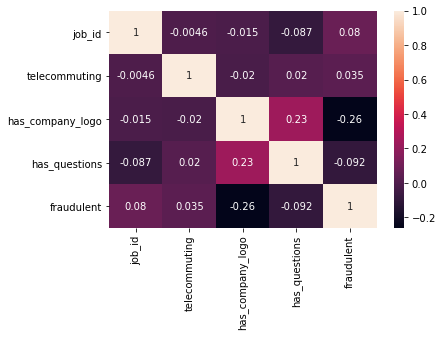

In [24]:
sns.heatmap(df.corr(),annot=True)

#### We can see from above that department and salary_range feature consists of more than 60% of missing data and also job_id column is also of not any use so it is better we drop them.

In [25]:
df.drop(['salary_range','department','job_id'],axis=1,inplace=True)

In [26]:
df.shape

(17880, 15)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17880 non-null  object
 2   company_profile      17880 non-null  object
 3   description          17880 non-null  object
 4   requirements         17880 non-null  object
 5   benefits             10670 non-null  object
 6   telecommuting        17880 non-null  int64 
 7   has_company_logo     17880 non-null  int64 
 8   has_questions        17880 non-null  int64 
 9   employment_type      14409 non-null  object
 10  required_experience  10830 non-null  object
 11  required_education   9775 non-null   object
 12  industry             12977 non-null  object
 13  function             11425 non-null  object
 14  fraudulent           17880 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 2.0+ MB


In [28]:
df['required_education'].nunique()

13

In [29]:
df['required_education'].value_counts()

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [30]:
df['required_education'].fillna(df['required_education'].bfill(),inplace=True)

In [31]:
df['required_education'].value_counts()

Bachelor's Degree                    9381
High School or equivalent            3701
Unspecified                          2615
Master's Degree                       812
Associate Degree                      530
Certification                         313
Some College Coursework Completed     179
Professional                          130
Vocational                            102
Doctorate                              49
Some High School Coursework            36
Vocational - HS Diploma                19
Vocational - Degree                    12
Name: required_education, dtype: int64

In [32]:
df['employment_type'].nunique()

5

In [33]:
df['employment_type'].value_counts()

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [34]:
df.dropna(subset=['employment_type'],axis=0,inplace=True)

In [35]:
df.shape

(14409, 15)

#### Again checking for % of empty values in features

In [36]:
for i in df.columns:
    print('% of null records in feature',i,': {:.2f}%'.format(df[i].isnull().sum()*100/len(df[i])))

% of null records in feature title : 0.00%
% of null records in feature location : 0.00%
% of null records in feature company_profile : 0.00%
% of null records in feature description : 0.00%
% of null records in feature requirements : 0.00%
% of null records in feature benefits : 36.93%
% of null records in feature telecommuting : 0.00%
% of null records in feature has_company_logo : 0.00%
% of null records in feature has_questions : 0.00%
% of null records in feature employment_type : 0.00%
% of null records in feature required_experience : 26.46%
% of null records in feature required_education : 0.01%
% of null records in feature industry : 11.96%
% of null records in feature function : 23.98%
% of null records in feature fraudulent : 0.00%


In [37]:
df['benefits'].nunique()

5297

In [38]:
df['benefits'].value_counts()

See job description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         726
Career prospects.                                                                                                                                                                                                                                                                                       

In [39]:
df['benefits'].fillna(df['benefits'].bfill(),inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14409 entries, 0 to 17879
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                14409 non-null  object
 1   location             14409 non-null  object
 2   company_profile      14409 non-null  object
 3   description          14409 non-null  object
 4   requirements         14409 non-null  object
 5   benefits             14408 non-null  object
 6   telecommuting        14409 non-null  int64 
 7   has_company_logo     14409 non-null  int64 
 8   has_questions        14409 non-null  int64 
 9   employment_type      14409 non-null  object
 10  required_experience  10597 non-null  object
 11  required_education   14408 non-null  object
 12  industry             12686 non-null  object
 13  function             10954 non-null  object
 14  fraudulent           14409 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 1.8+ MB


<AxesSubplot:>

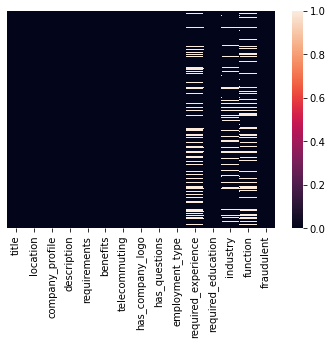

In [41]:
sns.heatmap(df.isnull(),yticklabels=False)

In [42]:
df['required_experience'].nunique()

7

In [43]:
df['required_experience'].value_counts()

Mid-Senior level    3791
Entry level         2628
Associate           2277
Not Applicable      1013
Director             387
Internship           361
Executive            140
Name: required_experience, dtype: int64

In [44]:
df['required_experience'].fillna(df['required_experience'].bfill(),inplace=True)

In [45]:
df['required_experience'].value_counts()

Mid-Senior level    5142
Entry level         3551
Associate           3120
Not Applicable      1384
Director             524
Internship           488
Executive            200
Name: required_experience, dtype: int64

In [46]:
df['industry'].nunique()

131

In [47]:
df['industry'].value_counts()

Information Technology and Services    1725
Computer Software                      1365
Internet                               1051
Marketing and Advertising               823
Education Management                    822
                                       ... 
Museums and Institutions                  1
Wine and Spirits                          1
Alternative Dispute Resolution            1
Sporting Goods                            1
Shipbuilding                              1
Name: industry, Length: 131, dtype: int64

In [48]:
df['industry'].fillna(df['industry'].bfill(),inplace=True)

In [49]:
df['industry'].value_counts()

Information Technology and Services    1950
Computer Software                      1545
Internet                               1197
Marketing and Advertising               941
Education Management                    908
                                       ... 
Sporting Goods                            1
Museums and Institutions                  1
Alternative Dispute Resolution            1
Wine and Spirits                          1
Shipbuilding                              1
Name: industry, Length: 131, dtype: int64

In [50]:
df['function'].nunique()

37

In [51]:
df['function'].value_counts()

Information Technology    1735
Sales                     1389
Engineering               1307
Customer Service          1154
Marketing                  772
Administrative             583
Design                     336
Education                  321
Management                 315
Health Care Provider       313
Other                      273
Business Development       221
Accounting/Auditing        207
Human Resources            189
Project Management         181
Finance                    166
Consulting                 144
Art/Creative               131
Writing/Editing            126
Production                 116
Product Management         110
Quality Assurance          108
Advertising                 89
Data Analyst                80
Business Analyst            77
Public Relations            75
Manufacturing               73
General Business            66
Research                    47
Legal                       46
Strategy/Planning           46
Training                    38
Supply C

In [52]:
df['function'].fillna(df['function'].bfill(),inplace=True)

In [53]:
df['function'].value_counts()

Information Technology    2283
Sales                     1826
Engineering               1748
Customer Service          1504
Marketing                  988
Administrative             802
Design                     435
Health Care Provider       422
Education                  411
Management                 408
Other                      344
Business Development       287
Accounting/Auditing        264
Human Resources            251
Project Management         245
Finance                    222
Consulting                 177
Writing/Editing            173
Art/Creative               165
Production                 156
Product Management         146
Quality Assurance          143
Advertising                116
Manufacturing              107
Public Relations           105
Business Analyst           101
Data Analyst               100
General Business            95
Strategy/Planning           71
Research                    62
Legal                       57
Training                    51
Financia

In [54]:
df.drop(df.index[14408:],inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14408 entries, 0 to 17878
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                14408 non-null  object
 1   location             14408 non-null  object
 2   company_profile      14408 non-null  object
 3   description          14408 non-null  object
 4   requirements         14408 non-null  object
 5   benefits             14408 non-null  object
 6   telecommuting        14408 non-null  int64 
 7   has_company_logo     14408 non-null  int64 
 8   has_questions        14408 non-null  int64 
 9   employment_type      14408 non-null  object
 10  required_experience  14408 non-null  object
 11  required_education   14408 non-null  object
 12  industry             14408 non-null  object
 13  function             14408 non-null  object
 14  fraudulent           14408 non-null  int64 
dtypes: int64(4), object(11)
memory usage: 1.8+ MB


In [56]:
df.isnull().sum()

title                  0
location               0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

<AxesSubplot:>

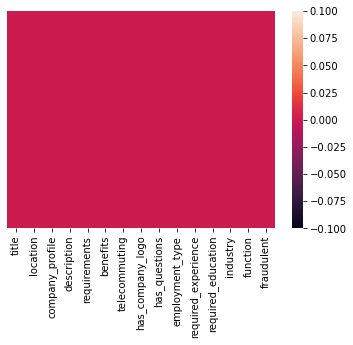

In [57]:
sns.heatmap(df.isnull(),yticklabels=False)

#### All missing values have been dealt with!

<AxesSubplot:>

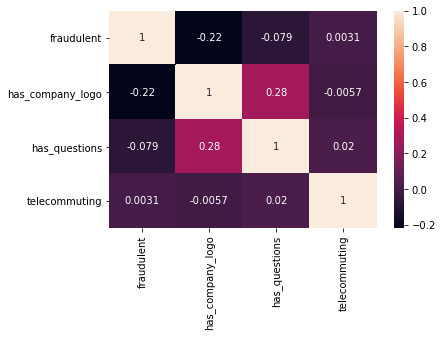

In [58]:
sns.heatmap(df[['fraudulent' ,'has_company_logo','has_questions','telecommuting']].corr(),annot=True)

<AxesSubplot:xlabel='employment_type', ylabel='count'>

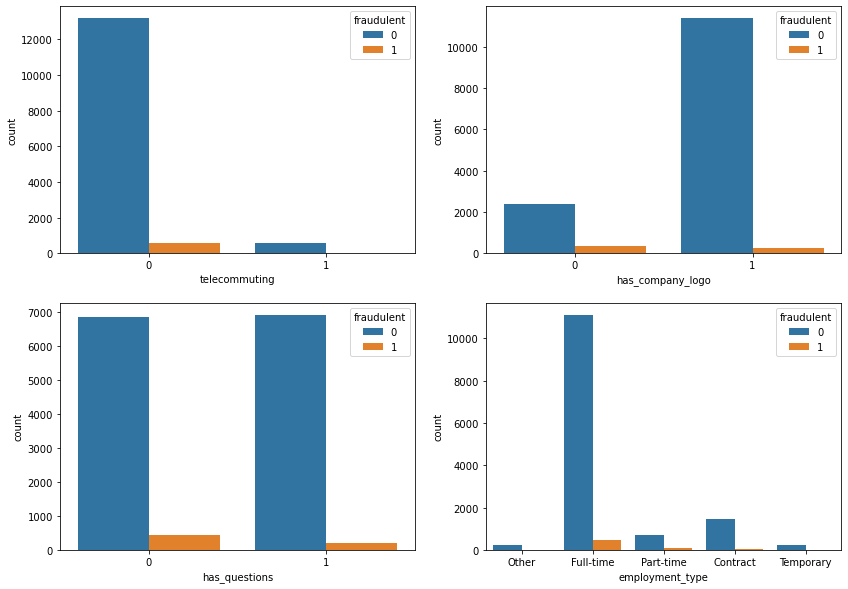

In [59]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.countplot(x='telecommuting',hue='fraudulent',data=df)
plt.subplot(2,2,2)
sns.countplot(x='has_company_logo',hue='fraudulent',data=df)
plt.subplot(2,2,3)
sns.countplot(x='has_questions',hue='fraudulent',data=df)
plt.subplot(2,2,4)
sns.countplot(x='employment_type',hue='fraudulent',data=df)

#### We can see from the above graphs about the trends of fraudulency based on various parametrs:
     1. In the firt plot it is clear that the ratio of fraudulency to telecommuting cases are more when a job type demands
       telecommuting.
     2. In case of company logo not present fraudulency is more.
     3. In case of no questions fraudulency is more in fact there is more of a negative correlation in case of this feature.
     4. Full time employment type posseses more fraudulency as compared to other types.

#### Feature Engineering

In [60]:
df['fraudulent'].value_counts()

0    13783
1      625
Name: fraudulent, dtype: int64

It is clearly an imbalanced data set we apply the Oversampling technique to balance the data so that we donot get biased output.

In [61]:
df.nunique()

title                   8929
location                2583
company_profile         1567
description            11987
requirements           10231
benefits                5297
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

We need to drop certain features in order to label certain categories

In [62]:
features=['title','location','company_profile','description','requirements','benefits','industry','function']
df.drop(features,axis=1,inplace=True)

In [63]:
df.dtypes

telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
fraudulent              int64
dtype: object

Dividing data into dependent and independent sets:

In [64]:
X=df.drop('fraudulent',axis=1)
y=df['fraudulent']

In [65]:
categorical=X.columns.tolist()
categorical

['telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education']

We do the labelling of data in order to feed it to the machine for model building.

In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical:
      df[i]=le.fit_transform(df[i])

In [67]:
df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,0,1,0,2,4,1,0
1,0,1,0,1,6,1,0
3,0,1,0,1,5,1,0
4,0,1,1,1,5,1,0
6,0,1,1,1,5,5,0


In [68]:
df.reset_index(drop=True,inplace=True)

In [69]:
df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,0,1,0,2,4,1,0
1,0,1,0,1,6,1,0
2,0,1,0,1,5,1,0
3,0,1,1,1,5,1,0
4,0,1,1,1,5,5,0


<AxesSubplot:>

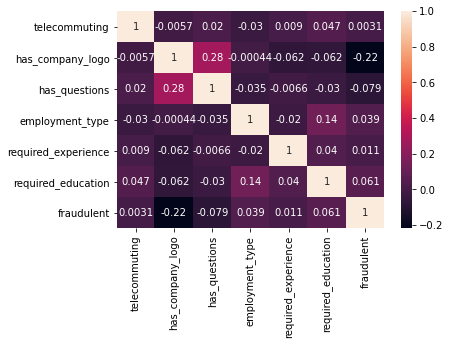

In [70]:
sns.heatmap(df.corr(),annot=True)

It is visible from above that has_company_logo feature shows max correlation with fraudulency.

Now we normalize the dataset in order to bring all the features to a common ground to do a comparison.

normalizing the dataset:

In [71]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_norm=ss.fit_transform(df[categorical])

In [72]:
df[categorical].columns

Index(['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education'],
      dtype='object')

Random Oversampling:

Technique used to balance the imbalance data set

In [73]:
from imblearn.over_sampling import RandomOverSampler
rs=RandomOverSampler(sampling_strategy='minority')
X_over,y_over=rs.fit_resample(X_norm,y)

In [74]:
y_over.value_counts()

1    13783
0    13783
Name: fraudulent, dtype: int64

Splitting into train and test set:

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_over,y_over,test_size=0.15,random_state=42)

In [76]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((23431, 6), (23431,), (4135, 6), (4135,))

#### Model Building

#### 1. Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,y_train)
y_predict=DT.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.8060459492140266

We do various parameter iterations to check for model best score.

#### Changing the max_depth

In [79]:
train_accuracy=[]
validation=[]
for i in range (1,30):
    DT=DecisionTreeClassifier(criterion='entropy',max_depth=i,random_state=10)
    DT.fit(X_train,y_train)
    train_accuracy.append(DT.score(X_train,y_train))
    validation.append(DT.score(X_test,y_test))

In [80]:
frame=pd.DataFrame({'max_depth':range(1,30),'train_accuracy':train_accuracy,'validation':validation})
frame.head()

,max_depth,train_accuracy,validation
0,1,0.711877,0.714389
1,2,0.711877,0.714389
2,3,0.719474,0.728174
3,4,0.729717,0.736880
4,5,0.740557,0.747279


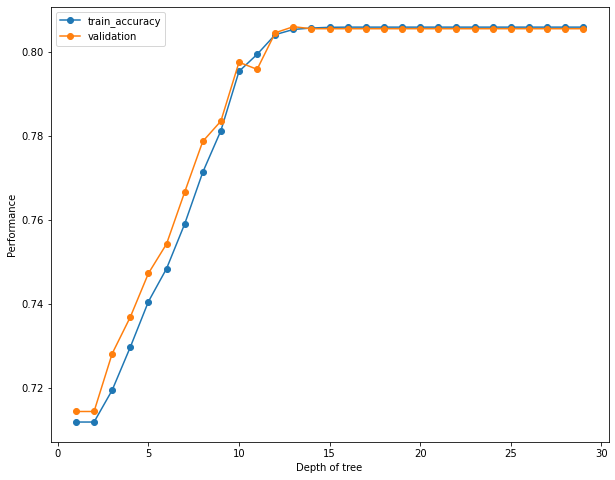

In [81]:
plt.figure(figsize=(10,8))
plt.plot(frame['max_depth'],frame['train_accuracy'],marker='o')
plt.plot(frame['max_depth'],frame['validation'],marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend(frame[['train_accuracy','validation']])
plt.show()

Let's visualize the Decision tree at the optimal value

We can see from above that the training and validation accuracy is similar and maximum at depth=10 

In [82]:
DT=tree.DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=10)
DT.fit(X_train,y_train)
DT
y_predict_DT=DT.predict(X_test)

In [83]:
#X_train=pd.DataFrame(X_train,columns=['telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       #'required_experience', 'required_education'])

In [84]:
#dot_data = StringIO()
#tree.export_graphviz(DT, out_file=dot_data,  
                #filled=True, rounded=True,
                #special_characters=True,feature_names=X_train.columns,class_names=DT.classes_)

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())

#### Changing the criterion this time to gini

In [85]:
train_accuracy=[]
validation=[]
for i in range (1,20):
    DT=DecisionTreeClassifier(criterion='gini',max_depth=i,random_state=10)
    DT.fit(X_train,y_train)
    train_accuracy.append(DT.score(X_train,y_train))
    validation.append(DT.score(X_test,y_test))

In [86]:
frame=pd.DataFrame({'max_depth':range(1,20),'train_accuracy':train_accuracy,'validation':validation})
frame.head()

,max_depth,train_accuracy,validation
0,1,0.711877,0.714389
1,2,0.711877,0.714389
2,3,0.719474,0.728174
3,4,0.730784,0.738815
4,5,0.741582,0.748005


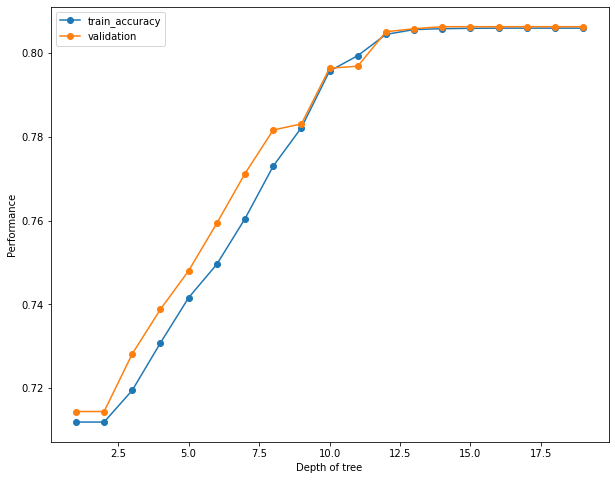

In [87]:
plt.figure(figsize=(10,8))
plt.plot(frame['max_depth'],frame['train_accuracy'],marker='o')
plt.plot(frame['max_depth'],frame['validation'],marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend(frame[['train_accuracy','validation']])
plt.show()

We can see similar curve here and maximum training an testing accuracy to be similar at a depth of 10.

### 2. SVM Model

In [88]:
from sklearn import svm
classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_test)

Checking the classification report:

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74      2094
           1       0.77      0.61      0.68      2041

    accuracy                           0.71      4135
   macro avg       0.72      0.71      0.71      4135
weighted avg       0.72      0.71      0.71      4135



Changing the Kernel functions and checking whether our model's accuracy increases:

In [90]:
classifier=svm.SVC(kernel='poly',gamma='auto',C=2)
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_test)

In [91]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75      2094
           1       0.78      0.62      0.69      2041

    accuracy                           0.72      4135
   macro avg       0.73      0.72      0.72      4135
weighted avg       0.73      0.72      0.72      4135



In [92]:
classifier=svm.SVC(kernel='rbf',gamma='auto',C=2)
classifier.fit(X_train,y_train)
y_predict_svm=classifier.predict(X_test)

In [93]:
print(classification_report(y_test,y_predict_svm))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2094
           1       0.77      0.75      0.76      2041

    accuracy                           0.77      4135
   macro avg       0.77      0.77      0.77      4135
weighted avg       0.77      0.77      0.77      4135



In [94]:
classifier=svm.SVC(kernel='sigmoid',gamma='auto',C=2)
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_test)

In [95]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.53      0.55      0.54      2094
           1       0.52      0.50      0.51      2041

    accuracy                           0.53      4135
   macro avg       0.53      0.53      0.53      4135
weighted avg       0.53      0.53      0.53      4135



Hence we can see from the classification reports that 'RBF' kernel function shows the best scores.

#### 3.Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression

Instantiating a regressor

In [97]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

Lets predict our data:

In [98]:
y_predict_lr=lr.predict(X_test)
y_predict_lr

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

Lets see how our model is performing:

In [99]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.53      0.55      0.54      2094
           1       0.52      0.50      0.51      2041

    accuracy                           0.53      4135
   macro avg       0.53      0.53      0.53      4135
weighted avg       0.53      0.53      0.53      4135



In [100]:
accuracy_score(y_test,y_predict)

0.5272067714631197

Lets test our model:

In [101]:
from sklearn.metrics import confusion_matrix

Lets build a confusion matrix to see :

In [102]:
pd.DataFrame(confusion_matrix(y_test,y_predict),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,1150,944
Actual Yes,1011,1030


#### 4.Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [104]:
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train, y_train)
y_pred_RF = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred_RF)

f1 = f1_score(y_test, y_pred_RF, average='weighted')
cm = confusion_matrix(y_test, y_pred_RF)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.806
Random Forest: f1-score=0.805


Let's visualize the confusion matrix:

In [106]:
pd.DataFrame(confusion_matrix(y_test,y_pred_RF),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])

,Predicted No,Predicted Yes
Actual No,1538,556
Actual Yes,247,1794


The random forest gives us the accuracy score of 80.6%

Let's check the important features in the RandomForest model

6


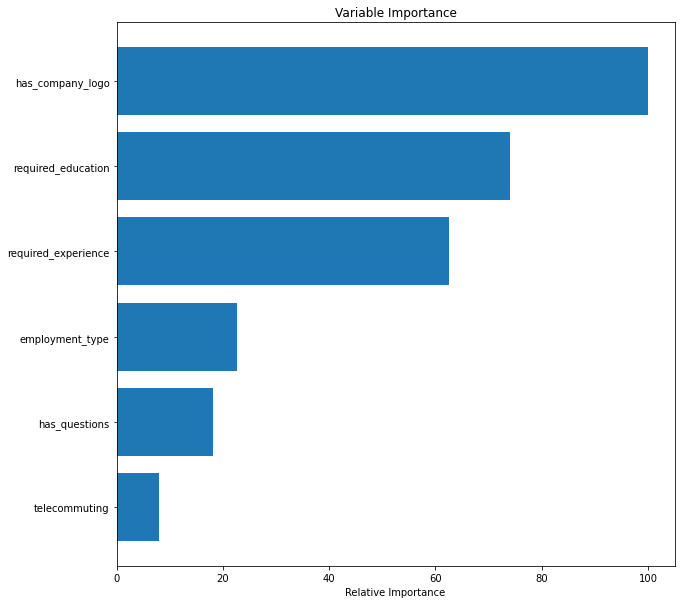

In [107]:
feature_importance = clf.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

We can see from above that the feature 'has_company_logo' is relatively the most important factor for deciding
the fraudulency of job.

#### Lets plot the ROC and AUC of the optimum models to finalize the best model

In [108]:
from sklearn.metrics import roc_curve,auc

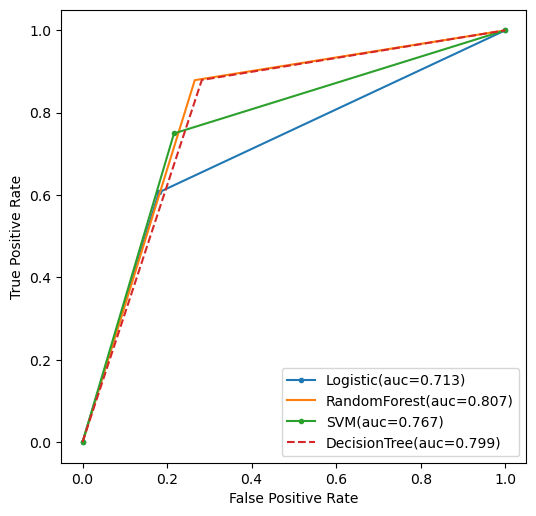

In [109]:
logistic_fpr,logistic_tpr,threshold=roc_curve(y_test,y_predict_lr)
auc_logistic=auc(logistic_fpr,logistic_tpr)

RF_fpr,RF_tpr,threshold=roc_curve(y_test,y_pred_RF)
auc_RF=auc(RF_fpr,RF_tpr)

svm_fpr,svm_tpr,threshold=roc_curve(y_test,y_predict_svm)
auc_svm=auc(svm_fpr,svm_tpr)

DT_fpr,DT_tpr,threshold=roc_curve(y_test,y_predict_DT)
auc_DT=auc(DT_fpr,DT_tpr)

plt.figure(figsize=(6,6),dpi=100)
plt.plot(logistic_fpr,logistic_tpr,marker='.',label='Logistic(auc=%0.3f)'%auc_logistic)
plt.plot(RF_fpr,RF_tpr,linestyle='-',label='RandomForest(auc=%0.3f)'%auc_RF)
plt.plot(svm_fpr,svm_tpr,marker='.',label='SVM(auc=%0.3f)'%auc_svm)
plt.plot(DT_fpr,DT_tpr,linestyle='--',label='DecisionTree(auc=%0.3f)'%auc_DT)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

#### We know that the curve having the maximum area is the best for the model building and we can see Random forest is having the maximum area under curve hence we will go with the Random forest model as our best model to figure out fraudulent job.